<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_02/Bootcamp_SD_Modulo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg">

# **Análise da Evolução da Vacinação e Casos de Tuberculose no Brasil**
---

Este é um trabalho de análise da evolução dos casos de tuberculose nas diferentes Unidades Federativas (UFs) do Brasil ao longo dos últimos 13 anos.

## **1. Escopo**
---

A proposta do presente estudo é avaliar a evolução dos casos notificados de tuberculose no Brasil usando os dados disponibilizados pelo DataSUS, via [TabNet](http://www2.datasus.gov.br/DATASUS/index.php?area=02).

A partir da evolução dos casos, vamos estudar os números de vacinação no mesmo período e também os gastos com internações hospitalares pelo SUS que foram declarados pelas UFs.

## **2. Contexto**
---

Antes de entrarmos no estudo propriamente dito, é importante colocarmos algumas informações que servem para entender o contexto.

O **SUS** (Sistema Único de Saúde) foi criado em 1988, a partir da promulgação da atual Constituição Brasileira, que estabeleceu como dever do Estado garantir a saúde de toda a população brasileira.

O **SUS** é hoje um dos maiores sistemas públicos de saúde do mundo e o único a garantir acesso integral, universal, igualitário e completamente gratuito para toda a população, desde o atendimento ambulatorial até procedimentos complexos como o transplante de órgãos, incluindo ações preventivas de educação, fiscalização e vacinação.

A responsabilidade pela administração do **SUS** é solidária, dividida entre o Governo Federal, Estadual e Municipal, cada um com suas atribuições e vinculação de verbas para aplicação na Saúde.

É importante destacar que essa longa cadeia de responsáveis traz como uma de suas consequências o atraso na disponibilização das informações. Apesar de presentemente estarmos em junho de 2021, o portal do Sistema de Informação Hospitalar Descentralizado ([link](http://sihd.datasus.gov.br/principal/index.php)) nos mostra que as informações de maio de 2020 ainda não atingiram os 90% de envio por parte das UFs.

Além disso vamos encontrar falta de padronização em parte dos dados que são remetidos pelas UFs, dificultando certos aprofundamentos e impossibilitando algumas conclusões, como será destacado ao longo do estudo.

## **3. Importação de Bibliotecas e Base de Dados**
---

Para começar nossa análise vamos importar algumas bibliotecas do ***Python*** que possibilitarão a análise dos dados e a elaboração de gráficos para facilitar a visualização.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
#from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [2]:
cores = {'Sul':'red',
         'Sudeste':'grey',
         'Norte':'green',
         'Nordeste':'orange',
         'Centro-Oeste':'purple'}

sns.set_style('darkgrid')

Os dados foram previamente importados, tratados e consolidados em outro *notebook* que pode ser encontrado [aqui](https://colab.research.google.com/drive/14h8yO5pCAPu_phciIRHfYF174S_k1C68?usp=sharing).

Faremos apenas a importação dos dados já tratados para começar nossa análise.

In [3]:
url_df = 'https://github.com/gcochlar/Bootcamp_DataScience/raw/main/Modulo_02/df_completo_2021-06-12.csv'
df = pd.read_csv(url_df, index_col=0)

In [4]:
### EXCLUIR

df.head()

,Ano,Casos Notif,Curados,Óbitos,Outros Fins,População,Popul 0 à 4,Vacinas,Internações,Permanência,Gastos,Região
UF,,,,,,,,,,,,
Rondônia,2008,564,428,8,128,1616992,157101,29397,65,876,6302.72,Norte
Acre,2008,314,266,9,39,705635,89775,22433,112,1298,33934.63,Norte
Amazonas,2008,2688,1952,89,647,3463562,420024,94189,295,3035,177027.78,Norte
Roraima,2008,155,127,5,23,440533,54297,10498,37,381,8248.71,Norte
Pará,2008,3790,2711,106,973,7402515,838448,211870,430,6069,341201.20,Norte


## **4. Evolução dos Casos de Tuberculose Atendidos pelo SUS**
---

Vamos começar analisando a evolução dos casos notificados de tuberculose no SUS.

Já separando o efeito da variação da população, vamos avaliar usando a contagem de casos para cada 100 mil habitantes, inicialmente agrupando os dados por região geográfica.

In [5]:
evol_casos = df[['Região','Ano','Casos Notif','Óbitos','População']].copy()
evol_casos['Casos 100k'] = (evol_casos['Casos Notif'] / evol_casos['População']) * 100000
evol_casos['Óbitos%'] = (evol_casos['Óbitos'] / evol_casos['Casos Notif'])

evol_casos_rg = evol_casos.groupby(['Região','Ano']).sum()
evol_casos_rg['Casos 100k'] = (evol_casos_rg['Casos Notif'] / evol_casos_rg['População']) * 100000
evol_casos_rg['Óbitos%'] = (evol_casos_rg['Óbitos'] / evol_casos_rg['Casos Notif'])

In [6]:
### EXCLUIR

evol_casos.head(3)

,Região,Ano,Casos Notif,Óbitos,População,Casos 100k,Óbitos%
UF,,,,,,,
Rondônia,Norte,2008,564,8,1616992,34.879579,0.014184
Acre,Norte,2008,314,9,705635,44.498926,0.028662
Amazonas,Norte,2008,2688,89,3463562,77.607965,0.033110


In [7]:
### EXCLUIR

evol_casos_rg.head(3)

Casos Notif  Óbitos  População  Casos 100k   Óbitos%
Região       Ano                                                       
Centro-Oeste 2008         3770     125   13814725   27.289722  0.033156
             2009         3663     145   14054150   26.063476  0.039585
             2010         3757     122   14292945   26.285695  0.032473

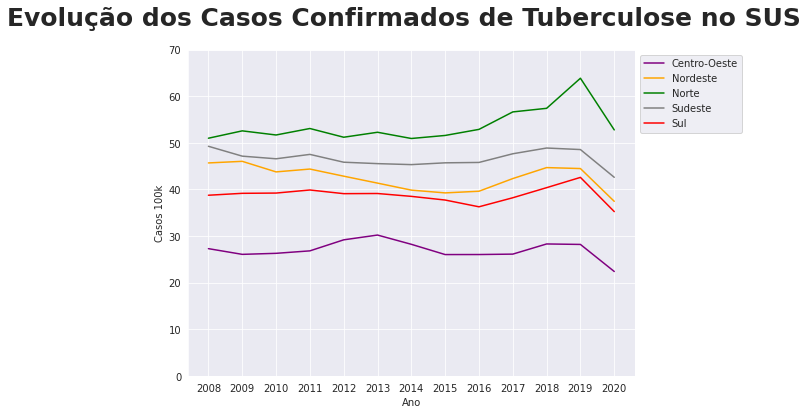

In [8]:
fig, ax00 = plt.subplots(figsize=(8,6))

ax00 = sns.lineplot(data = evol_casos_rg,
                x='Ano',
                y = 'Casos 100k',
                hue = 'Região',
                palette = cores)
plt.suptitle('Evolução dos Casos Confirmados de Tuberculose no SUS',
             fontweight = 'bold',
             fontsize=25)
plt.ylim(0,70)
plt.legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
plt.xticks(evol_casos_rg.reset_index()['Ano'].unique())
plt.show()

In [9]:
resol_casos = df[['Região','Ano','Casos Notif','Curados','Óbitos','Outros Fins']].copy()
resol_casos_rg = resol_casos.groupby(by = ['Região']).sum().drop('Ano',axis=1)

In [10]:
## EXCLUIR

resol_casos_rg

,Casos Notif,Curados,Óbitos,Outros Fins
Região,,,,
Centro-Oeste,53297,33799,1678,17820
Nordeste,309002,192797,11560,104645
Norte,120199,81030,3116,36053
Sudeste,515131,349613,18316,147202
Sul,146060,90144,4898,51018


Podemos observar que temos um aumento de casos mais ao final da nossa série de dados, principalmente em 2019 para as regiões Norte e Sul.

É importante destacar que a posterior queda que aparentamos ter em 2020 deve estar afetada por duas distorções que devem ser levadas em consideração:
* os dados de 2020 ainda não estão completos (vide **2. Contexto**, acima)
* a pandemia de COVID-19 que teve seus efeitos iniciais no Sistema de Saúde em março de 2020 e perdura até hoje ataca diretamente o sistema respiratório, possivelmente afetando os diagnósticos de tuberculose

Vamos investigar se temos algum estado se destacando nas duas regiões que apresentaram o crescimento de casos notificados.

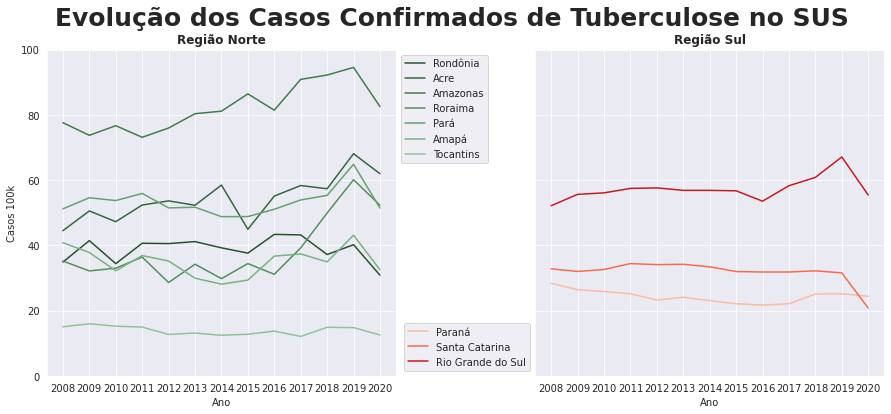

In [11]:
fig, ax01 = plt.subplots(ncols = 2,
                         sharey = True,
                         figsize=(15,6))

plt.subplots_adjust(wspace=0.4)
plt.suptitle('Evolução dos Casos Confirmados de Tuberculose no SUS',
             fontweight = 'bold',
             fontsize=25)

ax01[0] = sns.lineplot(data = evol_casos.query('Região == "Norte"'),
                x='Ano',
                y = 'Casos 100k',
                hue = 'UF',
                palette = sns.cubehelix_palette(7, start=2, rot=0, dark=0.25, light=.68, reverse=True),
                ax = ax01[0])
ax01[0].legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
ax01[0].set_title('Região Norte',
                  fontsize=12,
                  fontweight='bold')

ax01[1] = sns.lineplot(data = evol_casos.query('Região == "Sul"'),
                x='Ano',
                y = 'Casos 100k',
                hue = 'UF',
                palette = 'Reds',
                ax = ax01[1])
ax01[1].legend(bbox_to_anchor=(0,0),
          loc='lower right', ncol=1)
ax01[1].set_title('Região Sul',
                  fontsize=12,
                  fontweight='bold')


plt.ylim(0,100)
ax01[0].set_xticks(evol_casos.reset_index()['Ano'].unique())
ax01[1].set_xticks(evol_casos.reset_index()['Ano'].unique())
plt.show()

Enquanto não temos grandes destaques de comportamento na região **Norte**, pois podemos ver o crescimento do número de casos em quase todos os estados, excetuando Tocantins, na região **Sul** temos claramente que foi o Rio Grande do Sul que puxou o aumento do número de casos por 100 mil habitantes.

Resolvi então analisar se esse aumento de casos de alguma forma afetou a proporção de óbitos relacionados

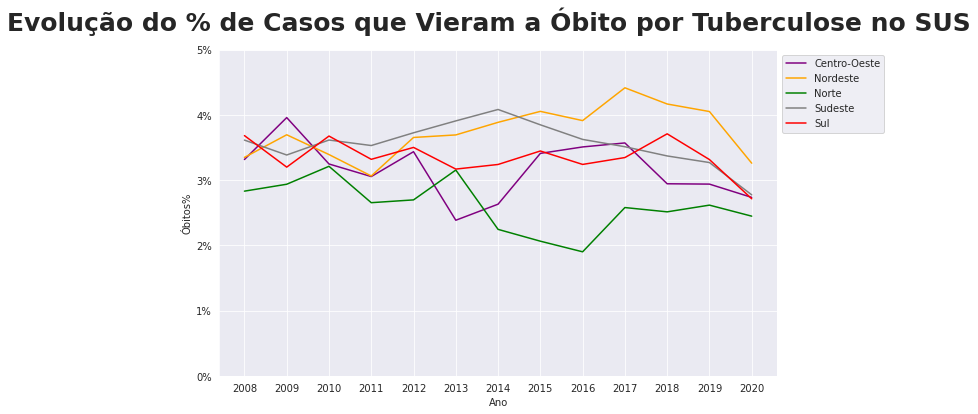

In [12]:
fig, ax02 = plt.subplots(figsize=(10,6))

ax02 = sns.lineplot(data = evol_casos_rg,
                x='Ano',
                y = 'Óbitos%',
                hue = 'Região',
                palette = cores)
plt.suptitle('Evolução do % de Casos que Vieram a Óbito por Tuberculose no SUS',
             fontweight = 'bold',
             fontsize=25)
plt.ylim(0,0.05)
plt.legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)

plt.xticks(evol_casos_rg.reset_index()['Ano'].unique())
ax02.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0%}'))

plt.show()

Uma avaliação inicial do percentual de casos que resultaram em óbito me chamou a atenção por haver uma certa proximidade entre os dados das diversas UFs. Além disso, a variação entre os valores máximos e mínimos de cada região variou próximo a um ponto percentual, apenas.

Sendo assim, resolvi avaliar a proporção dos óbitos no total da massa de dados para verificar a relevância e a consistência dessa informação.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


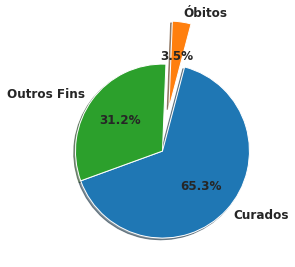

In [13]:
resol_casos_rg.drop('Casos Notif', axis = 1).sum().plot.pie(autopct='%.1f%%',
                                                            explode=(0,0.5,0),
                                                            shadow = True,
                                                            startangle=200,
                                                            textprops = {'fontsize':12,
                                                                         'fontweight':'bold'})
plt.axes().set_ylabel('')
plt.show()

O ponto positivo resultante dessa avaliação é de que temos um significativo índice de pacientes curados. O problema é o alto índice de casos encerrados com o resultado de '*Ignorado*' ou '*Não Informado*', além de outras respostas como '*Transferência*', quando o paciente é transferido para outra Unidade Hospitalar (em outro estabelecimento ou em outra ala, para tratar de outro problema de saúde). Esses resultados estão agrupados dentro do resultado '*Outros Fins*'.

Além disso, temos UFs em que a totalidade dos casos tem como resultado '*Ignorado*', dificultando uma análise consistente.

Diante disso, resolvi desconsiderar o índice de óbitos por enquanto e partir para a avaliação dos dados referentes à vacinação.

## **5. Cobertura da Vacinação**
---
A vacina utilizada para combater a tuberculose é a **BCG** (Bacilo de Calmette e Guérin) e deve ser tomada por recém nascidos, preferencialmente no primeiro mês de vida, mas pode ser tomada até os 5 anos de idade.

A **BCG** não evita a tuberculose pulmonar, mas combate as formas mais agressivas da doença, que podem evoluir para formas de meningite e óbito.

Para que o efeito esperado da vacinação seja alcançado é importante a cobertura máxima. A literatura médica recente cita como exemplo negativo a Suécia, que suspendeu a vacinação obrigatória e viu os casos, principalmente entre crianças, subir rapidamente.

*Fontes:*
* [01/7 – Dia da Vacina BCG](http://bvsms.saude.gov.br/ultimas-noticias/3222-01-7-dia-da-vacina-bcg-2)
* [Vacina BCG](https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-bcg)
* [Para que serve a vacina BCG?](https://eurofarma.com.br/artigos/para-que-serve-a-vacina-bcg)
* [Qual é a vacina que previne a tuberculose?](https://ipemed.com.br/blog/vacina-que-previne-tuberculose/)
* [Vacina BCG contra tuberculose:
efeito protetor e políticas de
vacinação](https://www.redalyc.org/pdf/672/67240164009.pdf)
* [7 perguntas frequentes sobre a vacina BCG](https://www.casacrescer.com/blog/vacina-bcg/)

Vamos avaliar a evolução da quantidade de doses aplicadas e a relação com o público alvo, que seriam os recém nascidos.

Mas para começar essa avaliação, vamos fazer uma análise rápida de como a população evoluiu nesse período nas diversas regiões.

In [14]:
evol_pop0a4_rg = df[['Região','Ano','Popul 0 à 4']].groupby(['Região','Ano']).sum()
evol_popul_rg = df[['Região','Ano','População']].groupby(['Região','Ano']).sum()

In [15]:
td_popul_rg = pd.pivot_table(data = evol_popul_rg.reset_index(),
                              index = 'Região',
                              columns = 'Ano')
td_popul_rg['Var 2008-2020'] = (td_popul_rg[('População',2020)] / td_popul_rg[('População',2008)]) - 1
td_popul_rg['Var 2015-2020'] = (td_popul_rg[('População',2020)] / td_popul_rg[('População',2015)]) - 1

print('Evolução da População Total')
display(td_popul_rg.T.tail(2)*100)

Evolução da População Total


,Região,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
,Ano,,,,,
Var 2008-2020,,19.411280,8.649063,18.679921,9.513909,9.453308
Var 2015-2020,,6.826138,2.855072,6.355074,3.330742,3.391789


In [16]:
td_pop0a4_rg = pd.pivot_table(data = evol_pop0a4_rg.reset_index(),
                              index = 'Região',
                              columns = 'Ano')
td_pop0a4_rg['Var 2008-2020'] = (td_pop0a4_rg[('Popul 0 à 4',2020)] / td_pop0a4_rg[('Popul 0 à 4',2008)]) - 1
td_pop0a4_rg['Var 2015-2020'] = (td_pop0a4_rg[('Popul 0 à 4',2020)] / td_pop0a4_rg[('Popul 0 à 4',2015)]) - 1

print('Evolução da População Entre 0 e 4 Anos')
display(td_pop0a4_rg.T.tail(2)*100)

Evolução da População Entre 0 e 4 Anos


,Região,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
,Ano,,,,,
Var 2008-2020,,-7.772024,-18.76650,-13.082536,-14.383996,-13.126743
Var 2015-2020,,-3.023135,-7.99381,-6.505294,-5.431426,-4.651499


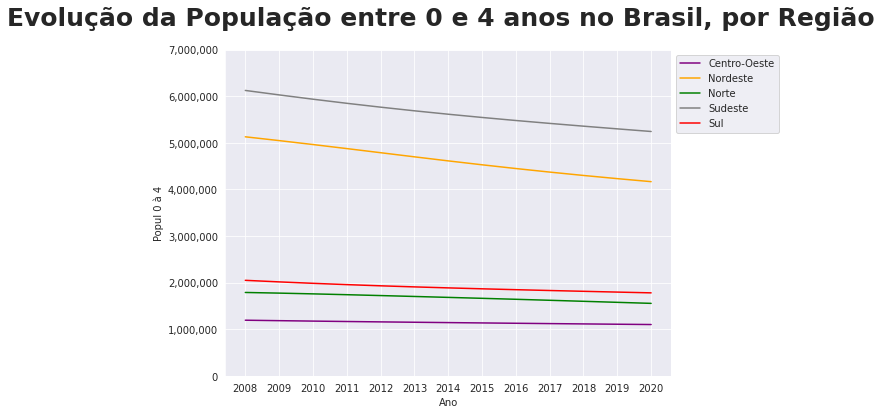

In [17]:
fig, ax03 = plt.subplots(figsize=(8,6))

ax03 = sns.lineplot(data = evol_pop0a4_rg,
                x='Ano',
                y = 'Popul 0 à 4',
                hue = 'Região',
                palette = cores)
plt.suptitle('Evolução da População entre 0 e 4 anos no Brasil, por Região',
             fontweight = 'bold',
             fontsize=25)
plt.ylim(0,7000000)
plt.legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
plt.xticks(evol_pop0a4_rg.reset_index()['Ano'].unique())
ax03.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

Apesar de termos uma queda na população entre 0 e 4 anos de idade, temos um crescimento na população total, nos mesmos períodos.

Isso indica um envelhecimento da população, realinhando a pirâmide etária, mas a pequena variação que temos nesse período, nos permite adotar uma premissa, que é uma distribuição relativamente uniforme nos 4 anos que compõem essa faixa etária, ou seja, 1/4 da população com cada idade.

Essa premissa nos permite assumir que, para manter os 100% dos recém nascidos, teríamos que ter a vacinação anual de aproximadamente 25% dessa faixa de população.

In [18]:
evol_vacinas = df[['Região','Ano','Vacinas','População','Popul 0 à 4']].copy()
evol_vacinas['Cobertura'] = (evol_vacinas['Vacinas'] / evol_vacinas['Popul 0 à 4'])
evol_vacinas['Cob Simul'] = (evol_vacinas['Vacinas'] / (evol_vacinas['Popul 0 à 4']/4))

evol_vacinas_rg = evol_vacinas.groupby(['Região','Ano']).sum()
evol_vacinas_rg['Cobertura'] = (evol_vacinas_rg['Vacinas'] / evol_vacinas_rg['Popul 0 à 4'])
evol_vacinas_rg['Cob Simul'] = (evol_vacinas_rg['Vacinas'] / (evol_vacinas_rg['Popul 0 à 4']/4))

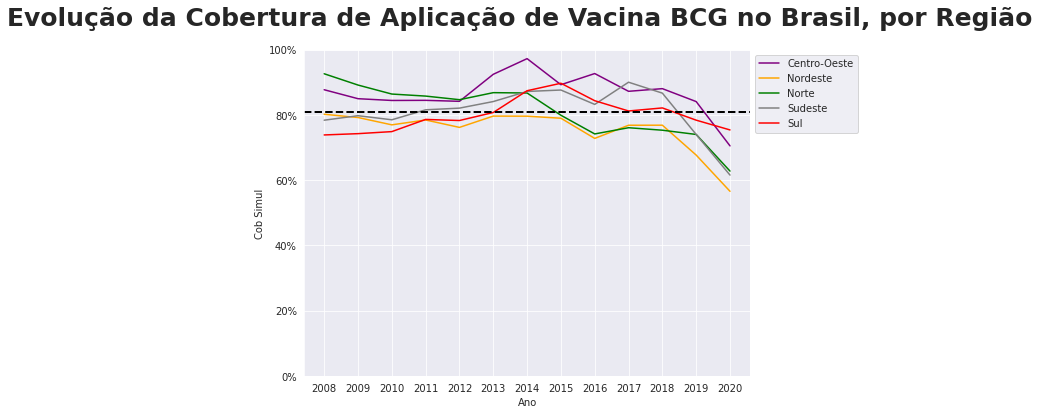

In [19]:
fig, ax04 = plt.subplots(figsize=(8,6))

ax04 = sns.lineplot(data = evol_vacinas_rg,
                x='Ano',
                y = 'Cob Simul',
                hue = 'Região',
                palette = cores)
plt.axhline(y=evol_vacinas_rg.mean()['Cob Simul'],ls='--',lw=2,color='k')
plt.suptitle('Evolução da Cobertura de Aplicação de Vacina BCG no Brasil, por Região',
             fontweight = 'bold',
             fontsize=25)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
ax04.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0%}'))
plt.xticks(evol_casos_rg.reset_index()['Ano'].unique())
plt.show()

Analisando a cobertura estimada desses 25% da população na faixa etária de 0 a 4 anos, ou seja, nossa estimativa do que seria a população de recém nascidos em cada ano, podemos perceber uma tendência de queda da cobertura de maneira geral, em todas as regiões. Isso é preocupante pois vimos acima que a vacinação só atinge seu efeito desejado se houver alta cobertura da população e que uma queda do percentual da população coberta pode trazer como consequência, além do crescimento da quantidade de casos, um aumento da complexidade e mortalidade dos casos.

Inclusive, traçando uma linha na média de nossa série de dados, por volta dos 80% de cobertura, podemos ver que todas as regiões apresentam cobertura inferior nos últimos 2 anos, sendo que a região Nordeste já está com menos de 60% de cobertura estimada no ano de 2020, o que é um patamar muito baixo.

Relembrando que vimos anteriormente que a Região Norte vinha apresentando um crescimento nos casos notificados, podemos observar que é uma região que tem mantido o percentual de cobertura estimado abaixo dos 80% desde 2015.

Vamos agora analisar o Rio Grande do Sul, que foi o estado que fez com que a Região Sul como um todo apresentasse um crescimento de casos notificados.

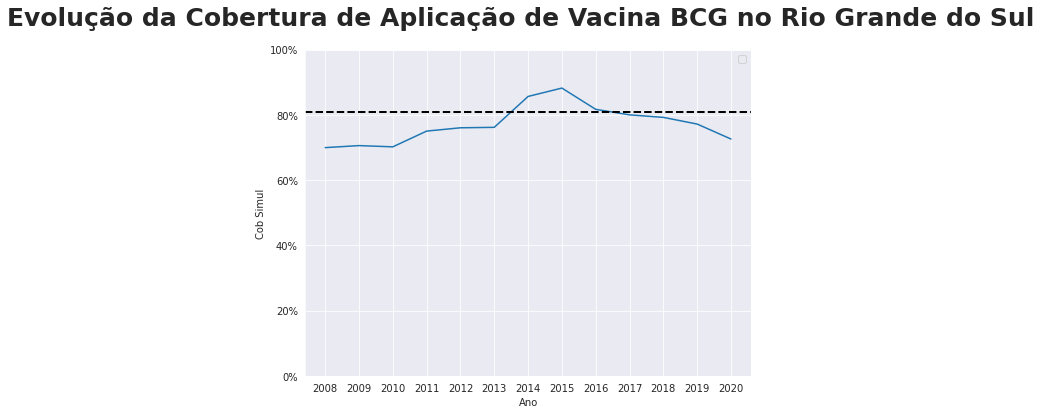

In [20]:
fig, ax05 = plt.subplots(figsize=(8,6))

ax05 = sns.lineplot(data = evol_vacinas.query('UF == "Rio Grande do Sul"'),
                x='Ano',
                y = 'Cob Simul',
                hue = 'Região')
plt.axhline(y=evol_vacinas_rg.mean()['Cob Simul'],ls='--',lw=2,color='k')
plt.suptitle('Evolução da Cobertura de Aplicação de Vacina BCG no Rio Grande do Sul',
             fontweight = 'bold',
             fontsize=25)
plt.ylim(0,1)
plt.legend('')
ax05.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0%}'))
plt.xticks(evol_casos_rg.reset_index()['Ano'].unique())
plt.show()

Apesar do Rio Grande do Sul também manter uma tendência de queda no seu percentual de cobertura e estar abaixo dos 80% de cobertura estimada desde 2017, a diferença não parece representativa a ponto de levar a um incremento significativo do número de casos notificados.

Como vimos anteriormente, a tendência de queda do percentual de cobertura é comum a todas as regiões, enquanto o aumento de casos noticiados parece ser mais significativo na Região Norte (em praticamente todos os estados) e na Região Sul (de forma concentrada no Rio Grande do Sul).

## **6. Gastos com Internações Hospitalares no SUS**
---
Vamos avaliar agora o que o aumento de casos notificados na Região Norte e no Rio Grande do Sul trouxe de variação em relação aos gastos que tivemos no mesmo período.

In [21]:
atends_n = df[['Região','Ano','Gastos','Internações','Permanência']].query('Região == "Norte"')
atends_n['Gastos por Intern'] = atends_n['Gastos'] / atends_n['Internações']
atends_n['Gasto Diário'] = atends_n['Gastos'] / atends_n['Permanência']
atends_rs = df[['Região','Ano','Gastos','Internações','Permanência']].query('UF == "Rio Grande do Sul"')
atends_rs['Gastos por Intern'] = atends_rs['Gastos'] / atends_rs['Internações']
atends_rs['Gasto Diário'] = atends_rs['Gastos'] / atends_rs['Permanência']

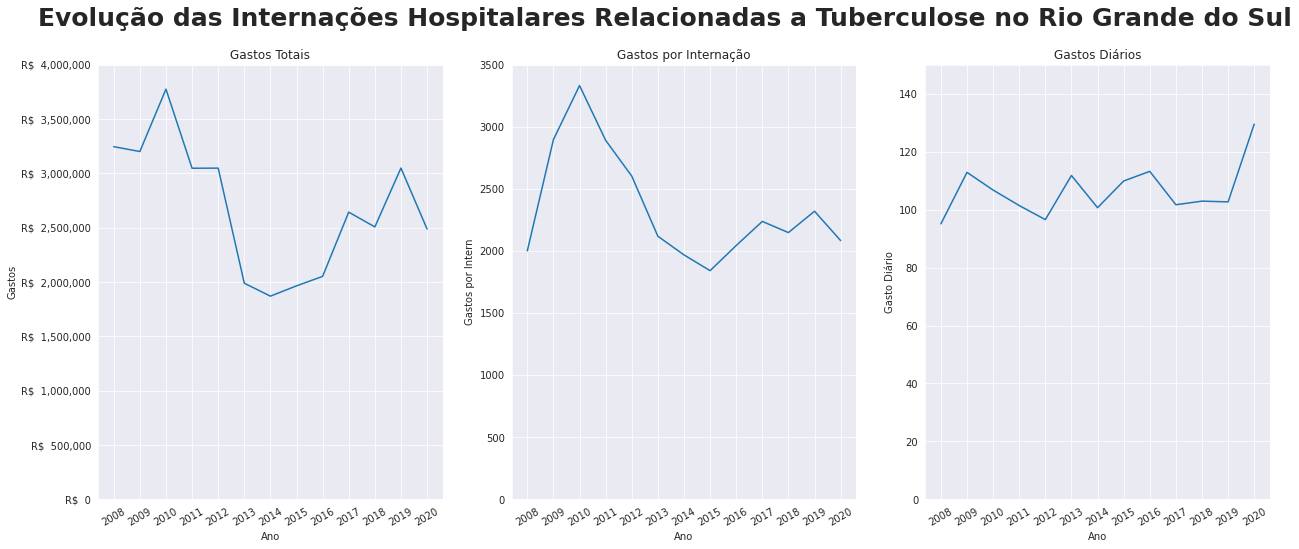

In [22]:
fig, ax06 = plt.subplots(ncols=3,
                         figsize=(21,8))

plt.subplots_adjust(wspace=0.2)

ax06[0] = sns.lineplot(data = atends_rs,
                x='Ano',
                y = 'Gastos',
                hue = 'UF',
                ax = ax06[0])
ax06[1] = sns.lineplot(data = atends_rs,
                x='Ano',
                y = 'Gastos por Intern',
                hue = 'UF',
                ax = ax06[1])
ax06[2] = sns.lineplot(data = atends_rs,
                x='Ano',
                y = 'Gasto Diário',
                hue = 'UF',
                ax = ax06[2])
plt.suptitle('Evolução das Internações Hospitalares Relacionadas a Tuberculose no Rio Grande do Sul',
             fontweight = 'bold',
             fontsize=25)
ax06[0].set_title('Gastos Totais')
ax06[1].set_title('Gastos por Internação')
ax06[2].set_title('Gastos Diários')

ax06[0].set_ylim(0,4000000)
ax06[1].set_ylim(0,3500)
ax06[2].set_ylim(0,150)
ax06[0].get_legend().remove()
ax06[1].get_legend().remove()
ax06[2].get_legend().remove()
ax06[0].yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x: ,.0f}'))
ax06[0].set_xticks(atends_rs.reset_index()['Ano'].unique())
ax06[1].set_xticks(atends_rs.reset_index()['Ano'].unique())
ax06[2].set_xticks(atends_rs.reset_index()['Ano'].unique())
ax06[0].tick_params(axis='x',labelrotation=30)
ax06[1].tick_params(axis='x',labelrotation=30)
ax06[2].tick_params(axis='x',labelrotation=30)

plt.show()

### Rio Grande do Sul
---
A avaliação da flutuação dos casos de 2019 encontra seu reflexo na parte financeira, de acordo com o esperado.

Como pode ser visto no primeiro gráfico, tivemos um aumento similar nos gastos totais, que ocorre de maneira mais suave no segundo gráfico, que representa os gastos por internação.

E esse aumento não ocorre no terceiro gráfico, que representa os custos diários. Isso nos indica que o aumento dos casos impactou no aumento de custos, alavancado por um maior tempo de permanência médio em cada internação.

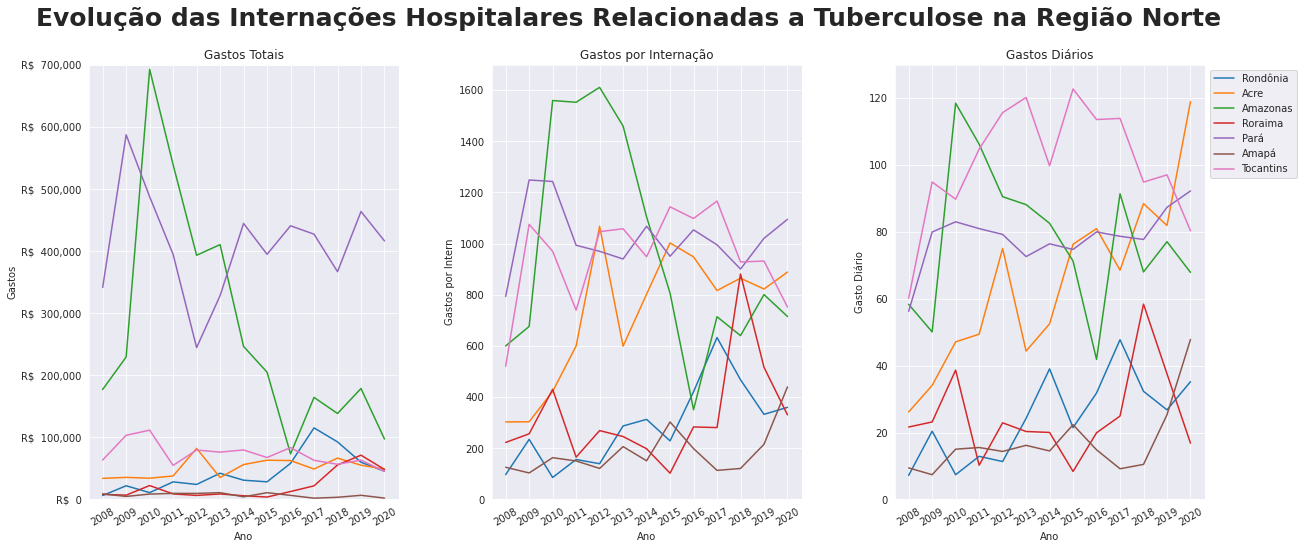

In [23]:
fig, ax07 = plt.subplots(ncols=3,
                         figsize=(20,8))

plt.subplots_adjust(wspace=0.3)

ax07[0] = sns.lineplot(data = atends_n,
                x='Ano',
                y = 'Gastos',
                hue = 'UF',
                ax = ax07[0])
ax07[1] = sns.lineplot(data = atends_n,
                x='Ano',
                y = 'Gastos por Intern',
                hue = 'UF',
                ax = ax07[1])
ax07[2] = sns.lineplot(data = atends_n,
                x='Ano',
                y = 'Gasto Diário',
                hue = 'UF',
                ax = ax07[2])
plt.suptitle('Evolução das Internações Hospitalares Relacionadas a Tuberculose na Região Norte',
             fontweight = 'bold',
             fontsize=25)
ax07[0].set_title('Gastos Totais')
ax07[1].set_title('Gastos por Internação')
ax07[2].set_title('Gastos Diários')

ax07[0].set_ylim(0,700000)
ax07[1].set_ylim(0,1700)
ax07[2].set_ylim(0,130)
ax07[0].get_legend().remove()
ax07[1].get_legend().remove()
ax07[2].legend(bbox_to_anchor=(1,1),
          loc='upper left', ncol=1)
ax07[0].yaxis.set_major_formatter(
    ticker.StrMethodFormatter('R$ {x: ,.0f}'))
ax07[0].set_xticks(atends_n.reset_index()['Ano'].unique())
ax07[1].set_xticks(atends_n.reset_index()['Ano'].unique())
ax07[2].set_xticks(atends_n.reset_index()['Ano'].unique())
ax07[0].tick_params(axis='x',labelrotation=30)
ax07[1].tick_params(axis='x',labelrotation=30)
ax07[2].tick_params(axis='x',labelrotation=30)

plt.show()

### Região Norte
---
A avaliação dos gastos na Região Norte fica bem mais complexa de ser avaliada em função das discrepâncias que temos entre as variações da quantidade de casos notificados e as variações dos gastos, tanto na sua forma total quanto nas visualizações ponderadas por internações ou por dias de permanência.

A análise dos valores de gastos diários, que seria a forma mais aberta dos gastos nos traz estados que gastaram menos de R\$ 20 por dia por paciente em 2020 em comparação com estados que gastaram mais de R\$ 120.

Além disso, a própria evolução dos gastos diários de alguns estados acaba ficando de difícil explicação sem a identificação de mais fatores que podem estar contribuindo para isso. 

Temos casos como o Acre, que gastava pouco mais de R\$ 25 / dia-paciente em 2008 e se aproximou de R\$ 120 / dia-paciente em 2020.

E ao mesmo tempo temos o Tocantins, que gastava R\$ 60 /dia-paciente em 2008, chegou a gastar mais de R\$ 120 em 2015 e fechou 2020 gastando na faixa dos R\$ 80.

Sem contar que parece claro que valores extremamente baixos (em diversos anos tivemos médias diárias inferiores a R\$ 20 em alguns estados) são indicadores de que deve haver falhas nos processos de apropriação de gastos, pois são valores que não cobrem as despesas de atendimento de pacientes em ambiente hospitalar.

## **7. Conclusões**
---

*Em relação aos Casos de Tuberculose no Brasil:*
* Excetuando o ano de 2019 que apresentou um pico na Região Norte e no Rio Grande do Sul, a tendência é de estabilidade no número de casos para cada 100 mil habitantes
* A morbidade da doença também parece estar estável nas diversas regiões, apesar de atualmente termos diferenças de até 1% entre os extremos
* Falta padronização e existem lacunas nos dados em relação ao resultado final dos casos, deixando a possibilidade do número de óbitos ser maior

*Em relação à Cobertura de Vacinação:*
* A queda da cobertura estimada é preocupante para uma doença que já estava de certa forma controlada e que depende da imunidade de grande parte da população para evitar o crescimento dos casos em sua modalidade mais complexa e letal
* Todas as regiões têm apresentado quedas mais acentuadas ainda nos últimos anos, podendo indicar o início de uma tendência perigosa para a saúde pública

*Em relação aos Gastos com Internações Hospitalares:*
* Nessa parte o foco foi avaliar apenas os gastos das regiões que haviam apresentado pico de crescimento de casos notificados em 2019
* A situação do Rio Grande do Sul parece estar compatível com o aumento de casos
* A situação da Região Norte não nos permitiu identificar uma relação entre o pico de casos notificados e os gastos apresentados
* A variação entre os valores diários apresentados nos diversos estados da Região Norte nos serve de indicativo de que devem ter outros fatores a serem estratificados para entender as diferenças
* Os valores identificados na Região Norte nos servem de indícios de que podem haver problemas de controles ou de apropriação de gastos


## **8. Próximos Passos**
---

* Aprofundar o estudo das diferenças de tratamentos aplicados para avaliar porque ocorre a diferença entre as regiões de até 1% em relação aos óbitos, pois isso representa a vida de mais de 1.000 brasileiros por ano
* Buscar melhorar a qualidade dos dados de resultado de tratamento, para poder confirmar efetivamente se a mortalidade da doença não está piorando
* Buscar dados reais de quantidades de nascimentos para confirmar os dados demográficos que foram estimados e calcular a real cobertura da vacinação
* Buscar justificativas para a queda da quantidade de doses aplicadas, acentuada nos últimos anos
* Identificar possíveis problemas de apropriação de gastos que justifiquem as discrepâncias entre os valores apresentados pelos diferentes estados para o tratamento do mesmo tipo de doença